In [36]:
import pandas as pd

# Loading in two datasets 
df_sale_price = pd.read_csv('Final-Exam/data/Metro_new_con_median_sale_price_per_sqft_uc_sfrcondo_month.csv')
df_sqft = pd.read_csv('Final-Exam/data/Metro_new_con_median_sale_price_per_sqft_uc_sfrcondo_month.csv')

# Checking for null values
# print(df_sale_price.isnull().sum())
# print(df_sqft.isnull().sum())

# Cleaning datasets
df_sale_price_cleaned = df_sale_price.dropna()
df_sqft_cleaned = df_sqft.dropna()

# Second check for null
print(df_sale_price_cleaned.isnull().sum())
print(df_sqft_cleaned.isnull().sum())

RegionID      0
SizeRank      0
RegionName    0
RegionType    0
StateName     0
             ..
2023-09-30    0
2023-10-31    0
2023-11-30    0
2023-12-31    0
2024-01-31    0
Length: 78, dtype: int64
RegionID      0
SizeRank      0
RegionName    0
RegionType    0
StateName     0
             ..
2023-09-30    0
2023-10-31    0
2023-11-30    0
2023-12-31    0
2024-01-31    0
Length: 78, dtype: int64


In [37]:
# Data types
print(df_sale_price.dtypes)
print(df_sqft.dtypes)

# Summary statistics 
print(df_sale_price.describe())
print(df_sqft.describe())

RegionID        int64
SizeRank        int64
RegionName     object
RegionType     object
StateName      object
               ...   
2023-09-30    float64
2023-10-31    float64
2023-11-30    float64
2023-12-31    float64
2024-01-31    float64
Length: 78, dtype: object
RegionID        int64
SizeRank        int64
RegionName     object
RegionType     object
StateName      object
               ...   
2023-09-30    float64
2023-10-31    float64
2023-11-30    float64
2023-12-31    float64
2024-01-31    float64
Length: 78, dtype: object
            RegionID    SizeRank  2018-01-31  2018-02-28  2018-03-31  \
count     141.000000  141.000000  103.000000  103.000000  103.000000   
mean   408627.687943  109.312057  148.091695  147.979321  150.373483   
std     80461.079891   95.828279   57.782102   53.237209   57.952730   
min    102001.000000    0.000000   88.479999   87.479576   90.827778   
25%    394549.000000   37.000000  113.074067  113.383670  115.469606   
50%    394792.000000   88.000000

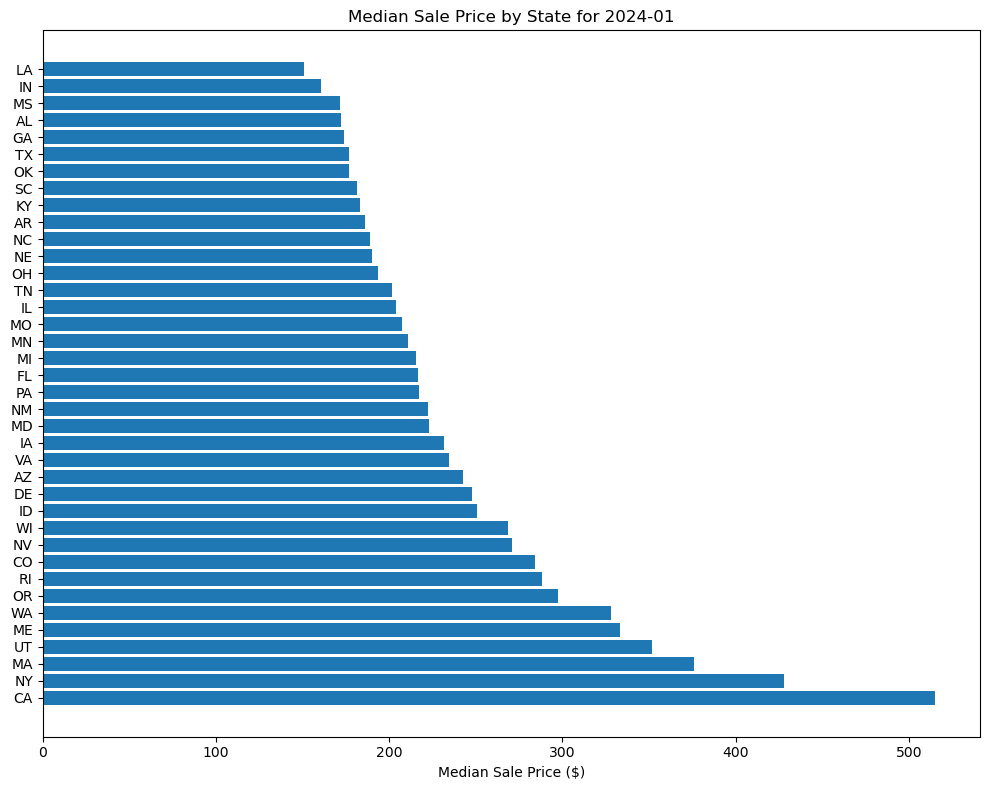

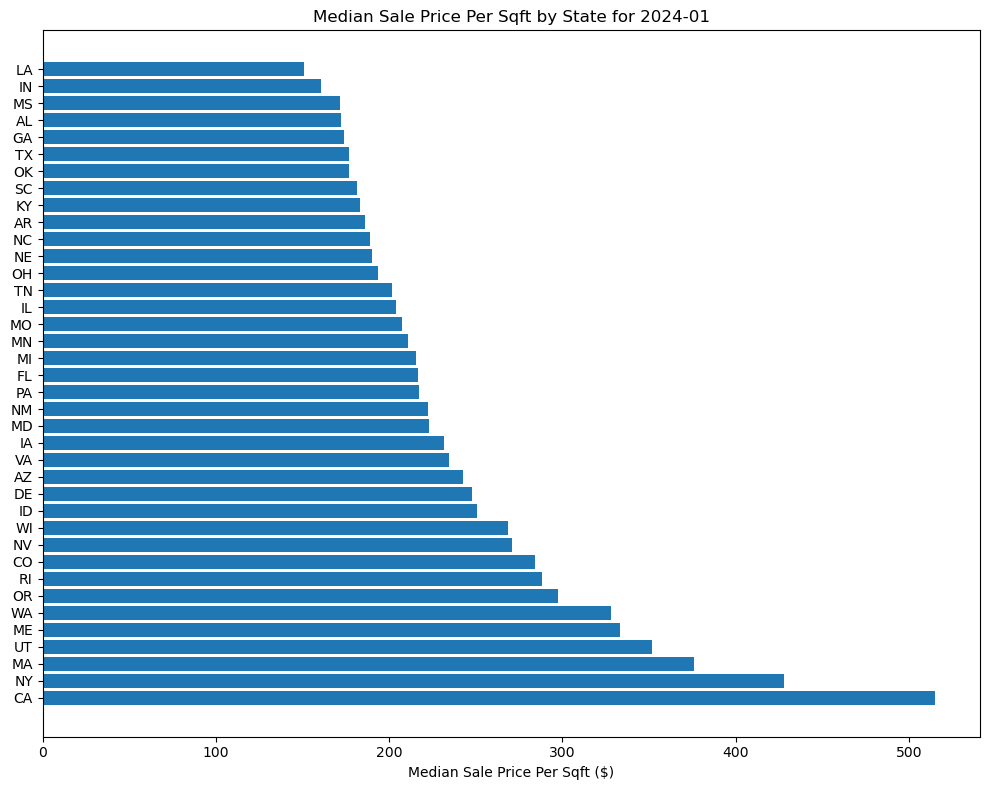

In [38]:
import matplotlib.pyplot as plt
import pandas as pd

state_median_price = df_sale_price.groupby('StateName')['2024-01-31'].mean().reset_index()
state_median_sqft = df_sqft.groupby('StateName')['2024-01-31'].mean().reset_index()

state_median_price = state_median_price.sort_values(by='2024-01-31', ascending=False)
state_median_sqft = state_median_sqft.sort_values(by='2024-01-31', ascending=False)

plt.figure(figsize=(10, 8))
plt.barh(state_median_price['StateName'], state_median_price['2024-01-31'])
plt.xlabel('Median Sale Price ($)')
plt.title('Median Sale Price by State for 2024-01')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 8))
plt.barh(state_median_sqft['StateName'], state_median_sqft['2024-01-31'])
plt.xlabel('Median Sale Price Per Sqft ($)')
plt.title('Median Sale Price Per Sqft by State for 2024-01')
plt.tight_layout()
plt.show()


/var/folders/nq/x683qlmx39ng8v_l8ymc6cw00000gn/T/ipykernel_44087/1664091945.py:5: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  gdf_countries = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


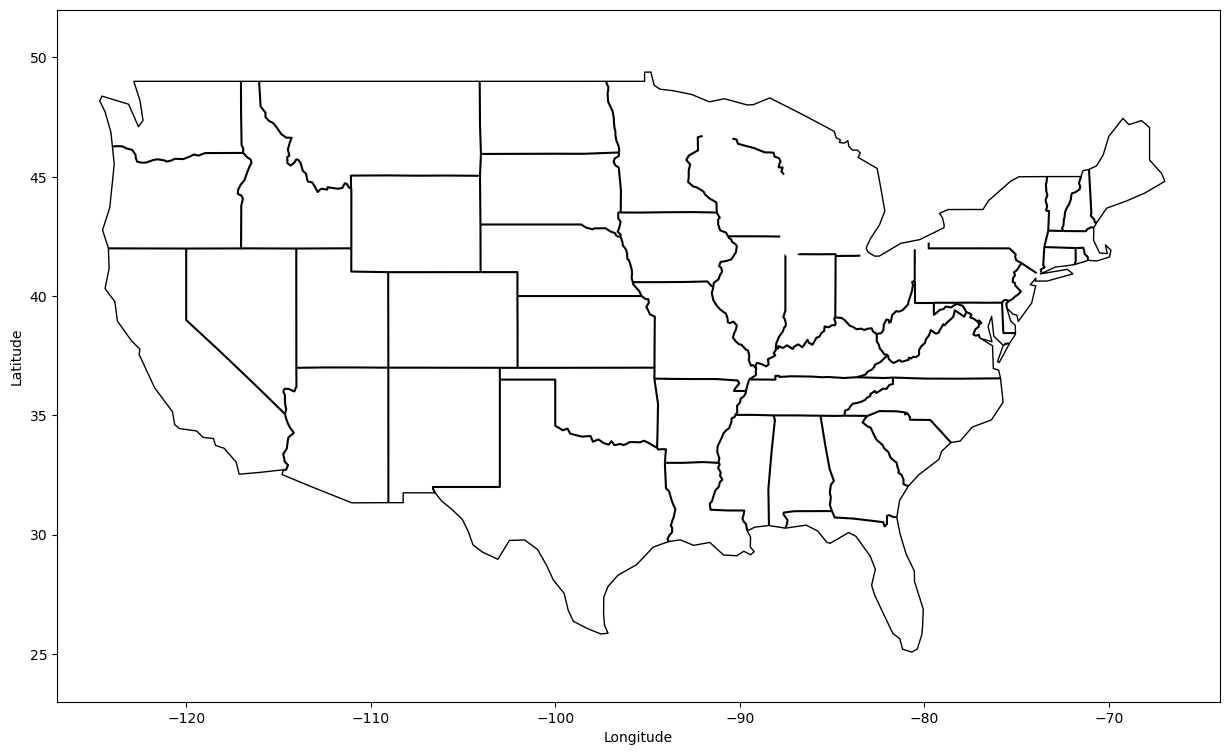

In [39]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Load the dataset that includes US country boundaries
gdf_countries = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Filter for the contiguous United States in the dataset
gdf_usa = gdf_countries[gdf_countries['name'] == 'United States of America']

# Load the shapefile for state borders
path_to_states = 'Final-Exam/data/110m_cultural/ne_110m_admin_1_states_provinces_lines.shp'  # Update to your path
gdf_states = gpd.read_file(path_to_states)

# Plot the United States
fig, ax = plt.subplots(figsize=(15, 10))
gdf_usa.plot(ax=ax, edgecolor='black', facecolor='none')

# Overlay state lines
gdf_states.plot(ax=ax, edgecolor='black', facecolor='none')

# Set the x and y limits to the bounding box for the contiguous U.S.
ax.set_xlim([-127, -64])
ax.set_ylim([23, 52])

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


In [40]:
# Assuming you have already merged your DataFrame with the GeoDataFrame
print(gdf_states.columns)


Index(['SCALERANK', 'FEATURECLA', 'NAME', 'ADM0_A3', 'ADM0_NAME', 'MAPCOLOR9',
       'MAPCOLOR13', 'MIN_ZOOM', 'FCLASS_ISO', 'FCLASS_US', 'FCLASS_FR',
       'FCLASS_RU', 'FCLASS_ES', 'FCLASS_CN', 'FCLASS_TW', 'FCLASS_IN',
       'FCLASS_NP', 'FCLASS_PK', 'FCLASS_DE', 'FCLASS_GB', 'FCLASS_BR',
       'FCLASS_IL', 'FCLASS_PS', 'FCLASS_SA', 'FCLASS_EG', 'FCLASS_MA',
       'FCLASS_PT', 'FCLASS_AR', 'FCLASS_JP', 'FCLASS_KO', 'FCLASS_VN',
       'FCLASS_TR', 'FCLASS_ID', 'FCLASS_PL', 'FCLASS_GR', 'FCLASS_IT',
       'FCLASS_NL', 'FCLASS_SE', 'FCLASS_BD', 'FCLASS_UA', 'NE_ID', 'BRK_A3',
       'FCLASS_TLC', 'geometry'],
      dtype='object')


/var/folders/nq/x683qlmx39ng8v_l8ymc6cw00000gn/T/ipykernel_44087/2126180079.py:5: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  gdf_countries = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


ValueError: aspect must be finite and positive 

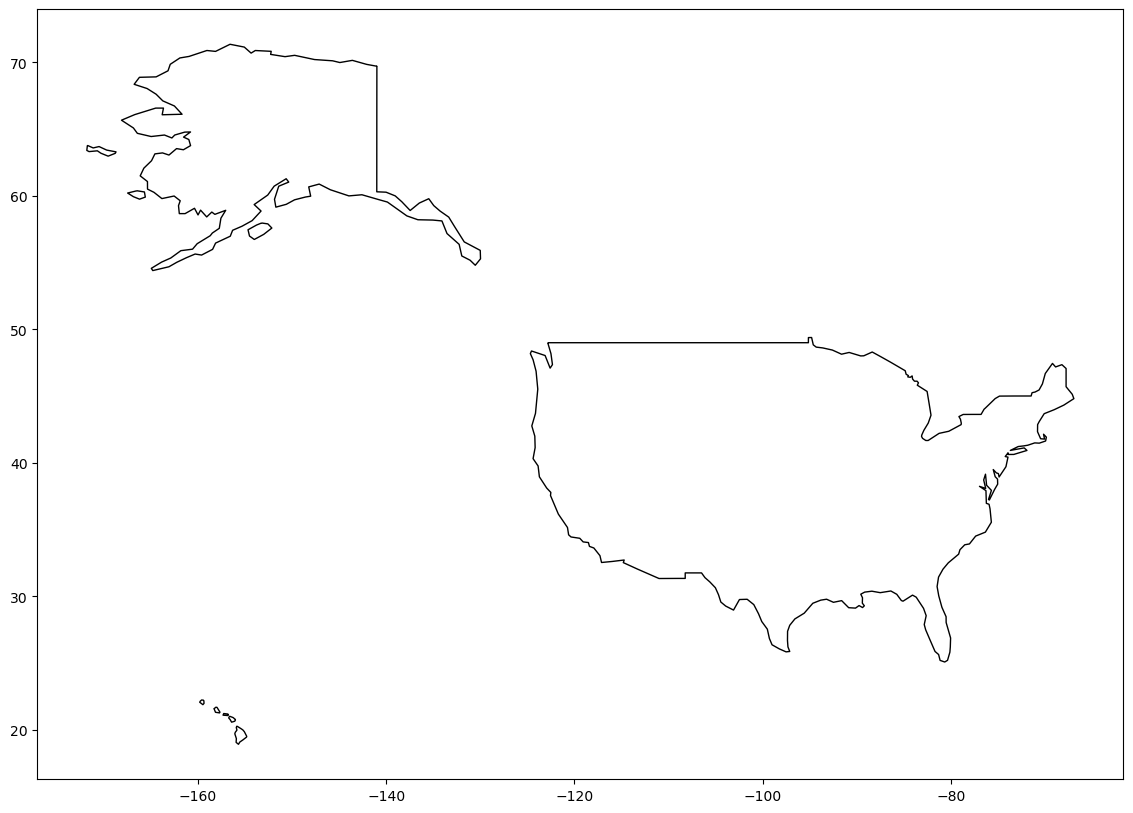

In [41]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Load the dataset that includes US country boundaries
gdf_countries = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Filter for the contiguous United States in the dataset
gdf_usa = gdf_countries[gdf_countries['name'] == 'United States of America']

# Load the shapefile for state borders
path_to_states = 'Final-Exam/data/110m_cultural/ne_110m_admin_1_states_provinces_lines.shp'
gdf_states = gpd.read_file(path_to_states)

# Assuming 'state_median_price' is a pandas DataFrame that you have already created
# This DataFrame must contain a 'StateName' column and a '2024-01-31' column for the median sale price

# Merge the state borders GeoDataFrame with the median sale price DataFrame
gdf_states_merged = gdf_states.merge(state_median_price, left_on='NAME', right_on='StateName')

# Plot the United States with states colored by median sale price
fig, ax = plt.subplots(figsize=(15, 10))
gdf_usa.plot(ax=ax, edgecolor='black', facecolor='none')  # Country outline

# Overlay state lines colored by median sale price
gdf_states_merged.plot(ax=ax, column='2024-01-31', edgecolor='black', cmap='OrRd', legend=True,
                       legend_kwds={'label': "Median Sale Price by State for January 2024"})

# Set the x and y limits to the bounding box for the contiguous U.S.
ax.set_xlim([-127, -64])
ax.set_ylim([23, 52])

# Remove automatic aspect setting by GeoPandas and set it manually if needed
# ax.set_aspect('auto')

# Remove axis for a cleaner look
ax.axis('off')

# Set labels and title
plt.title('Median Sale Price by State for January 2024')

plt.show()
